In [ ]:
# Competition rules: https://competition.statistics.gmu.edu/competition-rules/
# https://github.com/GMU-CherryBlossomCompetition/peak-bloom-prediction

# Prunus avium cities: Zurich, Geneva, Bern, Lausanne, Basel, Winterthur, Lucerne, St. Gallen, Thun, and Köniz
# Somei Yoshino: Seoul

In [4]:
library(tidyverse)

# Load cherry data
setwd("/home/joosungm/projects/def-lelliott/joosungm/projects/peak-bloom-prediction/code/")
cherry_main <- read.csv("../data/washingtondc.csv") %>% 
    bind_rows(read.csv("../data/liestal.csv")) %>% 
    bind_rows(read.csv("../data/kyoto.csv")) %>%
    # bind_rows(read.csv("../data/vancouver.csv")) %>%
    mutate(species = ifelse(location == "washingtondc", "Prunus yedoensis Somei-yoshino", 
                        ifelse(location == "liestal", "Prunus avium", 
                            ifelse(location == "kyoto", "Prunus jamasakura", "Prunus yedoensis Akebono"))))
van_df <- read.csv("../data/vancouver.csv")
van_df$species <- "Prunus yedoensis Akebono"
cherry_main[nrow(cherry_main)+1, ] <- van_df[1, ]
dim(cherry_main)
tail(cherry_main)

[1] 1066    8

,location,lat,long,alt,year,bloom_date,bloom_doy,species
,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>
1061,kyoto,35.01198,135.6761135,44,2018,2018-03-30,89,Prunus jamasakura
1062,kyoto,35.01198,135.6761135,44,2019,2019-04-05,95,Prunus jamasakura
1063,kyoto,35.01198,135.6761135,44,2020,2020-04-01,92,Prunus jamasakura
1064,kyoto,35.01198,135.6761135,44,2021,2021-03-26,85,Prunus jamasakura
1065,kyoto,35.01198,135.6761135,44,2022,2022-04-01,91,Prunus jamasakura
1066,vancouver,49.22370,–123.1636,24,2022,2022-03-27,86,Prunus yedoensis Akebono


In [8]:
cherry_main_kyoto <- cherry_main %>%
    filter(location == "kyoto") %>%
    filter(year %in% 1953:2022)
write.csv(cherry_main_kyoto, "../outputs/A_outputs/A11_kyoto_out.csv")
tail(cherry_main_kyoto)

,location,lat,long,alt,year,bloom_date,bloom_doy,species
,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<int>,<chr>
65,kyoto,35.01198,135.6761135,44,2017,2017-04-09,99,Prunus jamasakura
66,kyoto,35.01198,135.6761135,44,2018,2018-03-30,89,Prunus jamasakura
67,kyoto,35.01198,135.6761135,44,2019,2019-04-05,95,Prunus jamasakura
68,kyoto,35.01198,135.6761135,44,2020,2020-04-01,92,Prunus jamasakura
69,kyoto,35.01198,135.6761135,44,2021,2021-03-26,85,Prunus jamasakura
70,kyoto,35.01198,135.6761135,44,2022,2022-04-01,91,Prunus jamasakura


In [5]:
cherry_sub <- read.csv("../data/meteoswiss.csv") %>%
    bind_rows(read.csv("../data/south_korea.csv")) %>%
    bind_rows(read.csv("../data/japan.csv"))

cherry_sub$country = str_split(cherry_sub$location, pattern = "/", simplify = TRUE)[, 1] 
cherry_sub$city = str_split(cherry_sub$location, pattern = "/", simplify = TRUE)[, 2]

tail(cherry_sub)
dim(cherry_sub)

write.csv(cherry_sub, "../outputs/A_outputs/A11_cherry_sub.csv", row.names = FALSE)

,location,lat,long,alt,year,bloom_date,bloom_doy,country,city
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>
14075,Japan/Minamidaitojima,25.82889,131.2286,15.3,2014,2014-01-22,22,Japan,Minamidaitojima
14076,Japan/Minamidaitojima,25.82889,131.2286,15.3,2015,2015-02-13,44,Japan,Minamidaitojima
14077,Japan/Minamidaitojima,25.82889,131.2286,15.3,2016,2016-03-01,61,Japan,Minamidaitojima
14078,Japan/Minamidaitojima,25.82889,131.2286,15.3,2017,2017-02-14,45,Japan,Minamidaitojima
14079,Japan/Minamidaitojima,25.82889,131.2286,15.3,2018,2018-01-29,29,Japan,Minamidaitojima
14080,Japan/Minamidaitojima,25.82889,131.2286,15.3,2019,2019-02-12,43,Japan,Minamidaitojima


[1] 14080     9

In [6]:
# table(cherry_sub[cherry_sub$country == "South Korea", "city"])

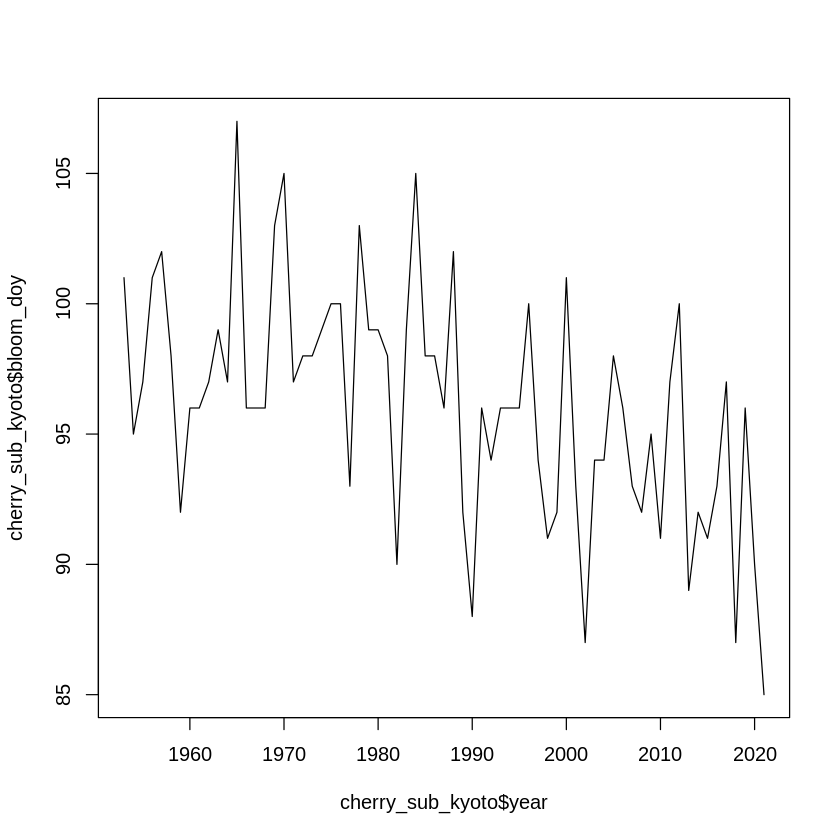

In [7]:
cherry_sub_kyoto <- cherry_sub[cherry_sub$city == "Kyoto", ]
plot(x = cherry_sub_kyoto$year, y = cherry_sub_kyoto$bloom_doy, type = "l")

In [107]:
min(cherry_sub_kyoto$year) 
max(cherry_sub_kyoto$year)
# download Kyoto weather data from 1953 to 2021.

[1] 1953

[1] 2021

In [88]:
table(cherry_sub$city)


                Abashiri                Adelboden                   Aikawa 
                      60                       55                       55 
                   Akita              Alchenflüh                   Altdorf 
                     138                       10                       41 
                  Andeer                   Aomori                Appenzell 
                      58                       66                       53 
               Asahikawa                 Aurigeno                   Azmoos 
                      69                       55                       43 
                 Ballens          Basel-Binningen                    Bauma 
                       7                       49                       51 
                Bellelay                     Biel              Birmensdorf 
                      25                       45                       39 
                  Blonay                    Boeun                 Bondo GR 
           

In [9]:
usa_npn_ind_cols <- c("Individual_ID", "Latitude", "Longitude", "Elevation_in_Meters", "State", "Genus", "Species", "Common_Name", "NumDays_Since_Prior_No", "Phenophase_Description", 
                        "First_Yes_Year", "First_Yes_Month", "First_Yes_Day", 
                        "Last_Yes_Year", "Last_Yes_Month", "Last_Yes_Day", "AGDD")
usa_npn_ind_data <- read.csv("../data/USA-NPN_individual_phenometrics_data.csv") %>%
    dplyr::select(all_of(usa_npn_ind_cols))
dim(usa_npn_ind_data)
head(usa_npn_ind_data)

[1] 196  17

,Individual_ID,Latitude,Longitude,Elevation_in_Meters,State,Genus,Species,Common_Name,NumDays_Since_Prior_No,Phenophase_Description,First_Yes_Year,First_Yes_Month,First_Yes_Day,Last_Yes_Year,Last_Yes_Month,Last_Yes_Day,AGDD
,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,4931,35.92618,-78.69272,129,NC,Prunus,yedoensis,Yoshino cherry,-9999,Open flowers,2009,3,29,2009,3,29,583.75
2,4931,35.92618,-78.69272,129,NC,Prunus,yedoensis,Yoshino cherry,3,Open flowers,2010,3,24,2010,3,25,423.50
3,5076,35.87523,-78.73708,118,NC,Prunus,yedoensis,Yoshino cherry,1,Open flowers,2010,3,22,2010,3,28,403.75
4,11222,38.88676,-77.04102,2,DC,Prunus,yedoensis,Yoshino cherry,-9999,Open flowers,2011,4,5,2011,4,5,436.25
5,11223,38.88676,-77.04102,2,DC,Prunus,yedoensis,Yoshino cherry,-9999,Open flowers,2011,4,5,2011,4,5,436.25
6,11224,38.88676,-77.04102,2,DC,Prunus,yedoensis,Yoshino cherry,-9999,Open flowers,2011,4,5,2011,4,5,436.25


In [12]:
usa_npn_stat_data <- read.csv("../data/USA-NPN_status_intensity_observations_data.csv") 
head(usa_npn_stat_data)

,Observation_ID,Update_Datetime,Site_ID,Latitude,Longitude,Elevation_in_Meters,State,Species_ID,Genus,Species,⋯,Tmin_Fall,Tmin,Tmin_in_F,Prcp_Winter,Prcp_Spring,Prcp_Summer,Prcp_Fall,Prcp,Accum_Prcp,Daylength
,<int>,<chr>,<int>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,164597,-9999,2251,45.4856,-122.8555,63,OR,87,Prunus,emarginata,⋯,7.25,5.0,41.0,368,329,126,314,6,133,32486
2,165211,-9999,2251,45.4856,-122.8555,63,OR,87,Prunus,emarginata,⋯,7.25,3.5,38.3,368,329,126,314,4,144,32832
3,165201,-9999,2251,45.4856,-122.8555,63,OR,87,Prunus,emarginata,⋯,7.25,6.0,42.8,368,329,126,314,0,170,33869
4,165960,-9999,2251,45.4856,-122.8555,63,OR,87,Prunus,emarginata,⋯,7.25,4.5,40.1,368,329,126,314,1,194,35251
5,168209,-9999,2251,45.4856,-122.8555,63,OR,87,Prunus,emarginata,⋯,7.25,6.0,42.8,368,329,126,314,5,233,36634
6,168861,-9999,2251,45.4856,-122.8555,63,OR,87,Prunus,emarginata,⋯,7.25,1.0,33.8,368,329,126,314,0,233,37325


In [13]:
colnames(usa_npn_ind_data)

[1] "Individual_ID"          "Latitude"               "Longitude"             
 [4] "Elevation_in_Meters"    "State"                  "Genus"                 
 [7] "Species"                "Common_Name"            "NumDays_Since_Prior_No"
[10] "Phenophase_Description" "First_Yes_Year"         "First_Yes_Month"       
[13] "First_Yes_Day"          "Last_Yes_Year"          "Last_Yes_Month"        
[16] "Last_Yes_Day"           "AGDD"

In [14]:
colnames(usa_npn_stat_data)

[1] "Observation_ID"         "Update_Datetime"        "Site_ID"               
 [4] "Latitude"               "Longitude"              "Elevation_in_Meters"   
 [7] "State"                  "Species_ID"             "Genus"                 
[10] "Species"                "Common_Name"            "Kingdom"               
[13] "Individual_ID"          "Phenophase_ID"          "Phenophase_Description"
[16] "Observation_Date"       "Day_of_Year"            "Phenophase_Status"     
[19] "Intensity_Category_ID"  "Intensity_Value"        "Abundance_Value"       
[22] "AGDD"                   "AGDD_in_F"              "Tmax_Winter"           
[25] "Tmax_Spring"            "Tmax_Summer"            "Tmax_Fall"             
[28] "Tmax"                   "Tmax_in_F"              "Tmin_Winter"           
[31] "Tmin_Spring"            "Tmin_Summer"            "Tmin_Fall"             
[34] "Tmin"                   "Tmin_in_F"              "Prcp_Winter"           
[37] "Prcp_Spring"            "Prcp_Summer"            "Prcp_Fall"             
[40] "Prcp"                   "Accum_Prcp"             "Daylength"

In [19]:
unique(usa_npn_stat_data$State)
idx <- usa_npn_stat_data$State == "Hyogo"
dc_npn <- usa_npn_stat_data %>%
    filter(State == "DC")
dim(dc_npn)

[1] "OR"             "OH"             "WA"             "CO"            
 [5] "CA"             "AB"             "TN"             "VA"            
 [9] "NC"             "MA"             "PA"             "NY"            
[13] "MO"             "DC"             "NJ"             "Okinawa"       
[17] "KY"             "MD"             "Liaoning Sheng" "Hyogo"         
[21] "RI"             "IN"             "UT"             "Chongqing Shi" 
[25] "MN"             "ON"             "BC"             "IL"            
[29] "VT"

[1] 256  42

In [44]:
unique(cherry$location)

[1] "washingtondc" "liestal"      "kyoto"

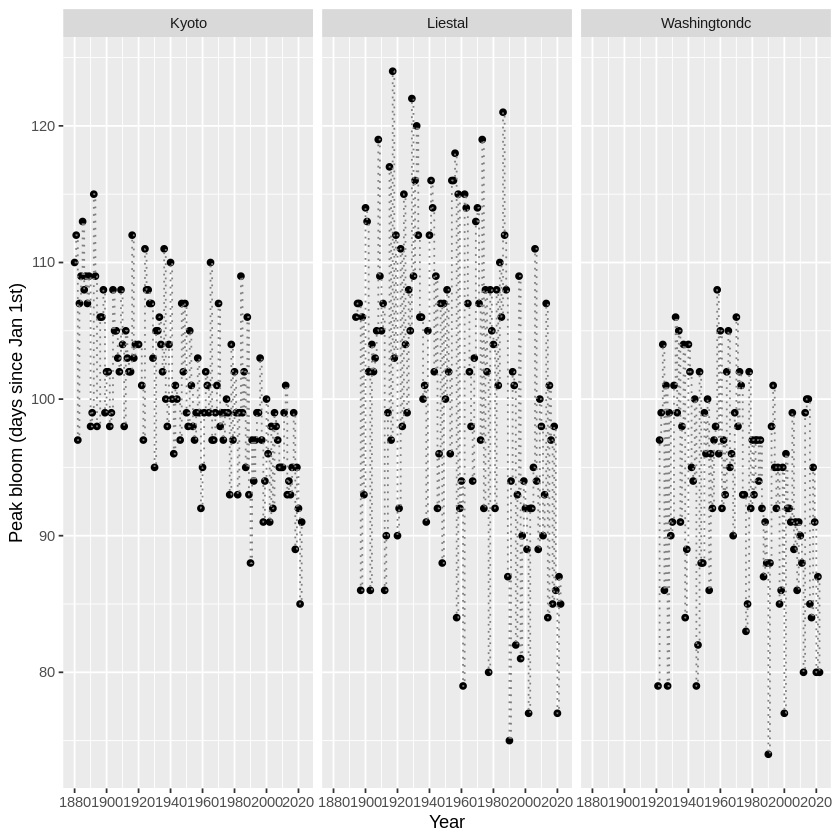

In [46]:
cherry %>% 
  filter(year >= 1880) %>%
  ggplot(aes(x = year, y = bloom_doy)) +
  geom_point() +
  geom_step(linetype = 'dotted', color = 'gray50') +
  scale_x_continuous(breaks = seq(1880, 2020, by = 20)) +
  facet_grid(cols = vars(str_to_title(location))) +
  labs(x = "Year", y = "Peak bloom (days since Jan 1st)")

In [ ]:
# Follow steps from 
# - Cesaraccio et al. 2004
# - Jung et al. 2005

# Obtain temperature data and compute:
# {Chill days (C_d), Anti-chill days(C_a)}

